<a href="https://colab.research.google.com/github/day-ch/Appteste/blob/main/O_que_se_tem_estudado_sobre_videogames_e_o_espectro_autista%3F_C%C3%B3digo_em_Phython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## O que se tem estudado sobre videogames e o espectro autista? Uma revisão sistemática de dados da base pubmed com auxílio de processamento de linguagem natural e deep learning.




Este notebook traz o código em Phython utilizado para a elaboração da revisão sistemática de dados do pubmed "O que se tem estudado sobre videogames e o espectro autista: uma revisão sistemática de dados da base pubmed com auxílio de processamento de linguagem natural e deep learning", apresentado no formato de poster no VII Congresso Internacional e XXVII Congresso Nacional da ABENEPI (Associação Brasileira de Neurologia e Psiquiatria Infantil e Profissões Afins).

Os códigos podem ser utilizados em auxílio a pesquisas e revisões de outros temas na base pubmed.


1) DOWNLOAD DOS ABSTRACTS


> Inicialmente o tema de interesse é buscado na base pubmed e os dados de cada artigo encontrado são baixados e salvos em um tabela no formato '.csv'. É gerado um arquivo com os artigos e seus 'abstracts'.

> Busca-se pelos termos pretendidos no pubmed, após a busca copia-se o que aparece no campo de endereço eletrônico após o "term=" e cola esse código no paramêtro "query" do código abaixo.

> O código abaixo copia todas as informações da busca para uma tabela .csv que fica salva na aba 'arquivos' do colab.

> Cada linha da tabela corresponde a um artigo, com colunas para título do artigo, autores, informações de autores, revista, 'abstract', DOI e miscelânea.

> O algoritmo abaixo utiliza o pacote 'eutils 0.6.0' para esses procedimentos.



Para mais informações sobre os parâmetros e o uso do pacote eutils para baixar informações do pubmed favor consultar:

 Sayers E. The E-utilities In-Depth: Parameters, Syntax and More. 2009 May 29 [Updated 2022 Nov 30]. In: Entrez Programming Utilities Help [Internet]. Bethesda (MD): National Center for Biotechnology Information (US); 2010-. Available from: https://www.ncbi.nlm.nih.gov/books/NBK25499/https://www.ncbi.nlm.nih.gov/books/NBK25499/

 Sayers E. E-utilities Quick Start. 2008 Dec 12 [Updated 2018 Oct 24]. In: Entrez Programming Utilities Help [Internet]. Bethesda (MD): National Center for Biotechnology Information (US); 2010-. Available from: https://www.ncbi.nlm.nih.gov/books/NBK25500/









In [ ]:
import csv
import re
import urllib
from time import sleep

# inicialmente busca-se as palavras chaves e/ou termos no campo de busca do pubmed
#(no caso da nossa revisão: ("Autism Spectrum Disorder"[Mesh]) AND "Video Games"[Mesh])), clica em 'Search'
# vai aparecer no campo de endereço eletrônico :
# https://pubmed.ncbi.nlm.nih.gov/?sort=date&term=(%22Autism+Spectrum+Disorder%22%5BMesh%5D)+AND+%22Video+Games%22%5BMesh%5D
# copia tudo que aparece após 'term=', (%22Autism+Spectrum+Disorder%22%5BMesh%5D)+AND+%22Video+Games%22%5BMesh%5D
# coloca como o parâmetro query abaixo

query = '(("Autism+Spectrum+Disorder"%5BMesh%5D)++AND+"Video+Games"%5BMesh%5D'
# common settings between esearch and efetch
base_url = 'http://eutils.ncbi.nlm.nih.gov/entrez/eutils/'
db = 'db=pubmed'

# esearch settings
search_eutil = 'esearch.fcgi?'
search_term = '&term=' + query
search_usehistory = '&usehistory=y'
search_rettype = '&rettype=json'

# call the esearch command for the query and read the web result
search_url = base_url+search_eutil+db+search_term+search_usehistory+search_rettype
print("this is the esearch command:\n" + search_url + "\n")
f = urllib.request.urlopen (search_url)
search_data = f.read().decode('utf-8')

# extract the total abstract count
total_abstract_count = int(re.findall("<Count>(\d+?)</Count>",search_data)[0])

# efetch settings
fetch_eutil = 'efetch.fcgi?'
retmax = 20
retstart = 0
fetch_retmode = "&retmode=text"
fetch_rettype = "&rettype=abstract"

# obtain webenv and querykey settings from the esearch results
fetch_webenv = "&WebEnv=" + re.findall ("<WebEnv>(\S+)<\/WebEnv>", search_data)[0]
fetch_querykey = "&query_key=" + re.findall("<QueryKey>(\d+?)</QueryKey>",search_data)[0]

# call efetch commands using a loop until all abstracts are obtained
run = True
all_abstracts = list()
loop_counter = 1

while run:
    print("this is efetch run number " + str(loop_counter))
    loop_counter += 1
    fetch_retstart = "&retstart=" + str(retstart)
    fetch_retmax = "&retmax=" + str(retmax)
    # create the efetch url
    fetch_url = base_url+fetch_eutil+db+fetch_querykey+fetch_webenv+fetch_retstart+fetch_retmax+fetch_retmode+fetch_rettype
    print(fetch_url)
    # open the efetch url
    f = urllib.request.urlopen (fetch_url)
    fetch_data = f.read().decode('utf-8')
    # split the data into individual abstracts
    abstracts = fetch_data.split("\n\n\n")
    # append to the list all_abstracts
    all_abstracts = all_abstracts+abstracts
    print("a total of " + str(len(all_abstracts)) + " abstracts have been downloaded.\n")
    # wait 2 seconds so we don't get blocked
    sleep(2)
    # update retstart to download the next chunk of abstracts
    retstart = retstart + retmax
    if retstart > total_abstract_count:
        run = False


this is the esearch command:
http://eutils.ncbi.nlm.nih.gov/entrez/eutils/esearch.fcgi?db=pubmed&term=(("Autism+Spectrum+Disorder"%5BMesh%5D)++AND+"Video+Games"%5BMesh%5D&usehistory=y&rettype=json

this is efetch run number 1
http://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?db=pubmed&query_key=1&WebEnv=MCID_6553b04fe2c4102e3777ea9d&retstart=0&retmax=20&retmode=text&rettype=abstract
a total of 20 abstracts have been downloaded.

this is efetch run number 2
http://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?db=pubmed&query_key=1&WebEnv=MCID_6553b04fe2c4102e3777ea9d&retstart=20&retmax=20&retmode=text&rettype=abstract
a total of 40 abstracts have been downloaded.

this is efetch run number 3
http://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?db=pubmed&query_key=1&WebEnv=MCID_6553b04fe2c4102e3777ea9d&retstart=40&retmax=20&retmode=text&rettype=abstract
a total of 60 abstracts have been downloaded.

this is efetch run number 4
http://eutils.ncbi.nlm.nih.gov/entrez/eutils/e

In [ ]:
with open("Abstracts_total1.csv", "wt",encoding="utf-8") as abstracts_file:
    abstract_writer = csv.writer(abstracts_file)
    abstract_writer.writerow(['Journal', 'Title', 'Authors', 'Author_Information', 'Abstract', 'DOI', 'Misc'])
    #For each abstract, split into categories and write it to the csv file
    for abstract in all_abstracts:
        #To obtain categories, split every double newline.
        split_abstract = abstract.split("\n\n")
        abstract_writer.writerow(split_abstract)

2) APLICAÇÃO DE CRITÉRIOS DE INCLUSÃO E EXCLUSÃO

A tabela gerada no passo anterior é manualmente checada. Os artigos que não se encaixam nos critérios de inclusão ou aqueles que apresentam critérios para exclusão são excluídos da tabela.


> Critérios de inclusão: População que engloba crianças, adolescentes ou adultos com transtorno do espectro autista (TEA). Artigos sobre uso de video games em português, inglês ou espanhol. Artigos dos últimos 20 anos.


> Critérios de exclusão: População que não TEA. Outras línguas que não português, inglês ou espanhol. Artigos que não tem como assunto video games. Artigos sem abstracts disponíveis.

A tabela gerada após aplicação dos critérios de elegibilidade se encontra abaixo:

https://drive.google.com/file/d/1ZQ_Gi8gS768-Zvj7t_fx2h-bepTvpG1a/view?usp=drive_link



3) SUMARIZAÇÃO DOS ABSTRACTS UTILIZANDO DEEP LEARNING

Os abstracts são sumarizados de forma automatizada utilizando um modelo de deep learning de arquitetura 'transformers' da google o 'Pegasus x-sum'. Os abstracts sumarizados em uma frase são salvos em um arquivo/tabela .csv.



In [ ]:
import pandas as pd

In [ ]:
#leitura de csv com titulo e abstract
df=pd.read_csv('', usecols= ['Title','Abstract'])
print(df)

                                                Title  \
0   Video Game Use, Aggression, and Social Impairm...   
1   I can actually do it without any help or someo...   
2   Is active video gaming associated with improve...   
3   A Mobile Game Platform for Improving Social Co...   
4   Interventions with Serious Games and Entertain...   
..                                                ...   
57  Influence of colour on acquisition and general...   
58  Temporal dynamics reveal atypical brain respon...   
59  Using computerized games to teach face recogni...   
60  Designing affective video games to support the...   
61  Engagement with electronic screen media among ...   

                                             Abstract  
0   We used parent report data to investigate vide...  
1   Research into autistic adolescents' engagement...  
2   Active video gaming (AVG) is a way that childr...  
3   BACKGROUND: Many children with autism cannot r...  
4   The use of serious games and en

In [ ]:
df['Text']=df["Title"].map(str) + " " + df["Abstract"]
text=df['Text'].tolist()
text2=[]
for item in text:
    item2=str(item)
    text2.append(item2)

In [ ]:
!pip install transformers
!pip install transformers[sentencepiece]
!pip install torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 45.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.1/311.1 kB 29.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 73.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 61.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 32.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 15.2 MB/s eta 0:00:00


In [ ]:
from transformers import PegasusForConditionalGeneration, PegasusTokenizer
import torch

src_text = text2

model_name = "google/pegasus-xsum"
device = "cuda" if torch.cuda.is_available() else "cpu"
tokenizer = PegasusTokenizer.from_pretrained(model_name)
model = PegasusForConditionalGeneration.from_pretrained(model_name).to(device)

summary=[]
for text in src_text:
  batch = tokenizer(text, truncation=True, padding="longest", return_tensors="pt").to(device)
  translated = model.generate(**batch)
  tgt_text = tokenizer.batch_decode(translated, skip_special_tokens=True)
  summary.append(tgt_text)

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-xsum and are newly initialized: ['model.encoder.embed_positions.weight', 'model.decoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
myFile = open('Sumario.csv', 'w')
writer = csv.writer(myFile)
writer.writerow(['Sumario'])
for data_list in summary:
    writer.writerow(data_list)
myFile.close()
myFile = open('Sumario.csv', 'r')
print("The content of the csv file is:")
print(myFile.read())
myFile.close()

The content of the csv file is:
Sumario
Parents of adolescents with autism spectrum disorder are more likely to report that their child plays video games as a hobby compared to parents of adolescents with typical development. Parents of autistic adolescents were more likely to report that their child plays video games as a hobby compared to parents of adolescents with typical development and also reported that their children
'I'm really good at this.
The objectives of this study were:
This article is copyrighted.
The aim of this study was to conduct a systematic review and compare the use of serious games and entertainment games in autism spectrum disorder.
Games for training working memory in children with autism spectrum disorder.
"The purpose of this study was to investigate whether gaming disorder symptoms are heightened in adults with autism spectrum disorder in comparison to a control group, and explored predictors of GD in 230 adults with ASD and 272 controls."
A video game-base

4) PROCESSAMENTO DE LINGUAGEM NATURAL E FREQUÊNCIAS

A tabela gerada no passo 2 é pré-processada, sendo acrescentadas as colunas "Ano" e "Journals", conforme link abaixo:

https://drive.google.com/file/d/1qrShMjjZhyfqnvGwGX0A4KrTnW5Z8eDa/view?usp=drive_link

São utilizadas técnicas de processamento de linguagem natural aplicadas as colunas da tabela dos artigos. São calculados as frequências das palavras na coluna Autores para auxiliar na identificação dos autores com o maior número de publicações sobre o tema. O mesmo é feito para a coluna 'Ano','Journal', 'Informação de autores' e 'abstracts'.

A partir da frequência de palavras de todo o texto contido em todas as linhas da coluna 'abstract' (com a exclusão de stopwords definidas) é montado uma nuvem de palavras que pode apontar para temas mais investigados pelos artigos pubmed sobre video games e o espectro autista.



In [1]:
import pandas as pd
dr = pd.read_csv('/content/drive/MyDrive/COMPARTILHADA Poster Abenepi/Artigos_Revisão3.csv')

FREQUÊNCIA AUTORES

In [3]:
dr["mytext_new"] = dr['Authors'].str.lower().str.replace('[^\w\s]','').str.replace('\n', ' ').str.replace('[^A-Za-z0-9]+', ' ')
dr['Authors'] = dr['mytext_new'].str.replace('\d+', '')

new_df = dr.mytext_new.str.split(expand=True).stack().value_counts().reset_index()
new_df.columns = ['Word', 'Frequency']

mask = (new_df['Word'].str.len() > 3)
dy = new_df.loc[mask]
dy

<ipython-input-3-8637176ddf1b>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  dr["mytext_new"] = dr['Authors'].str.lower().str.replace('[^\w\s]','').str.replace('\n', ' ').str.replace('[^A-Za-z0-9]+', ' ')
<ipython-input-3-8637176ddf1b>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  dr['Authors'] = dr['mytext_new'].str.replace('\d+', '')


,Word,Frequency
20,creemers,3
21,kang,3
22,engels,3
24,weiss,3
25,wijnhoven,3
...,...,...
385,antunes,1
386,massetti,1
387,guarnieri,1
389,crocetta,1


FREQUÊNCIA ANO

In [4]:
dano= dr['Ano'].value_counts()
print(dano)

2020    9
2018    8
2019    7
2015    7
2022    6
2021    6
2016    6
2017    4
2023    2
2013    2
2012    1
2011    1
2010    1
2009    1
2008    1
Name: Ano, dtype: int64


FREQUÊNCIA REVISTA

In [5]:
dfj= dr['Journals'].value_counts()
print(dfj)

J Autism Dev Disord                    15
Games Health J                          6
Sci Rep                                 4
Stud Health Technol Inform              3
BMJ Open                                2
Autism                                  2
Res Dev Disabil                         2
Tenn Med                                1
Annu Int Conf IEEE Eng Med Biol Soc     1
Am J Speech Lang Pathol                 1
BMC Psychiatry                          1
Biomed Mater Eng                        1
J Intellect Disabil Res                 1
J Dev Behav Pediatr                     1
Dev Cogn Neurosci                       1
Dev Neurobiol                           1
J Intellect Dev Disabil                 1
Child Adolesc Psychiatr Clin N Am       1
Psychol Sci                             1
Curr Opin Psychiatry                    1
Dev Neurorehabil                        1
Br J Dev Psychol                        1
IEEE Comput Graph Appl                  1
Z Kinder Jugendpsychiatr Psychothe

FREQUÊNCIA DE PALAVRAS EM ABSTRACTS

In [6]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Baixar o corpus de Stopwords
nltk.download('stopwords')

# Baixar o tokenizador
nltk.download('punkt')

# Função para pré-processar o texto
def preprocess_text(text):
    # Converter para minúscula
    text = text.lower()

    # Remover pontuações
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenizar o texto
    tokens = word_tokenize(text)

    # Remover as stopwords
    stop_words = stopwords.words('english')
    new_stopwords = ["game","games","video","years","asd", "autism", "spectrum","research","disorders","analysis","people","time","studies","findings","control","significant","disorder","analisys","methods","also","associated","disorder", "study","results", "use","individuals","used","data","information","autistic","may","group", "participants", "using"]
    stop_words.extend(new_stopwords)
    tokens = [token for token in tokens if token not in stop_words]

    # Juntar os tokens em um 'string'
    text = ' '.join(tokens)

    return text

# Aplicar a função de pré-processamento de texto e criar uma coluna com os abstracts processados
dr['AbstractPre'] = dr['Abstract'].apply(preprocess_text)

# Visualização das cinco primeiras linhas do dataframe pós-processamento
print(dr.head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


                                             Journal             Journals  \
0  2. J Autism Dev Disord. 2023 Sep;53(9):3567-35...  J Autism Dev Disord   
1  3. Br J Dev Psychol. 2022 Nov;40(4):557-571. d...     Br J Dev Psychol   
2  4. Child Neuropsychol. 2023 Jan;29(1):1-27. do...   Child Neuropsychol   
3  5. Appl Clin Inform. 2021 Oct;12(5):1030-1040....     Appl Clin Inform   
4  6. Dev Neuropsychol. 2021 Oct;46(7):463-485. d...     Dev Neuropsychol   

    Ano                                              Title  \
0  2023  Video Game Use, Aggression, and Social Impairm...   
1  2022  I can actually do it without any help or someo...   
2  2023  Is active video gaming associated with improve...   
3  2021  A Mobile Game Platform for Improving Social Co...   
4  2021  Interventions with Serious Games and Entertain...   

                                             Authors  \
0      davis k iosif am nordahl cw solomon m krug mk   
1                    pavlopoulou g usher c pearson a

In [7]:
from collections import Counter

# Criando frequência de palavras
word_freq = Counter()

for text in dr['AbstractPre']:
    word_freq.update(text.split())

# Visualizar palavras mais frequentes
print(word_freq.most_common(30))

[('children', 153), ('social', 70), ('intervention', 46), ('adolescents', 32), ('skills', 32), ('anxiety', 32), ('training', 31), ('symptoms', 29), ('parents', 28), ('play', 24), ('treatment', 24), ('design', 24), ('motor', 23), ('learning', 23), ('development', 22), ('interventions', 22), ('media', 22), ('clinical', 21), ('physical', 21), ('gaming', 19), ('serious', 19), ('developing', 19), ('compared', 18), ('face', 18), ('showed', 18), ('youth', 18), ('behaviors', 17), ('without', 17), ('attention', 17), ('p', 16)]


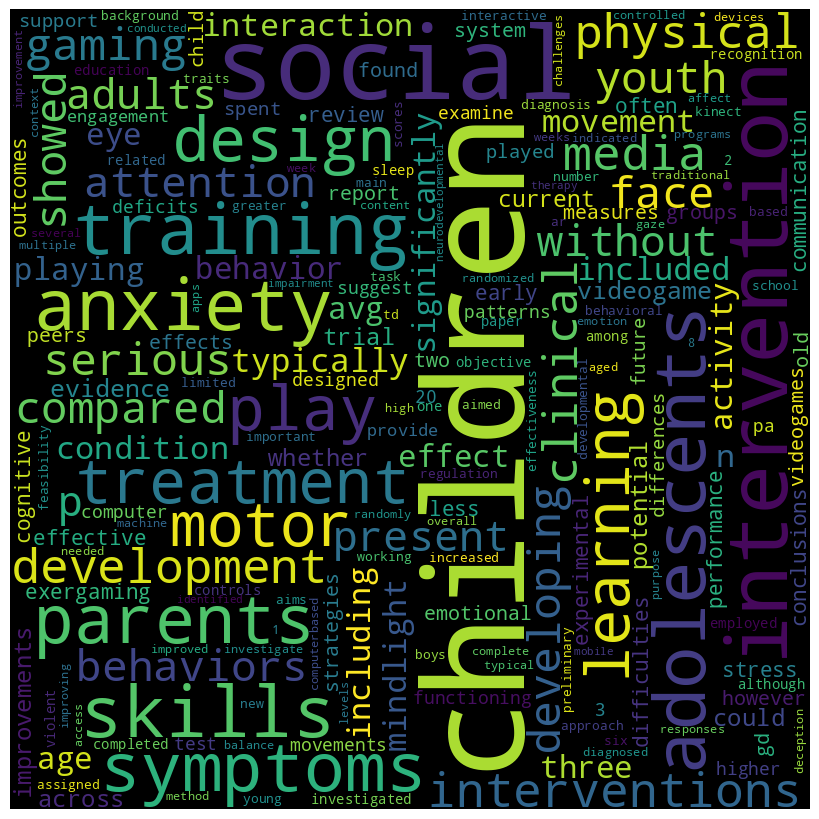

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Gerar uma nuvem de palavras
wordcloud = WordCloud(width=800, height=800, background_color='black').generate_from_frequencies(word_freq)

# Plotar uma nuvem de palavras
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

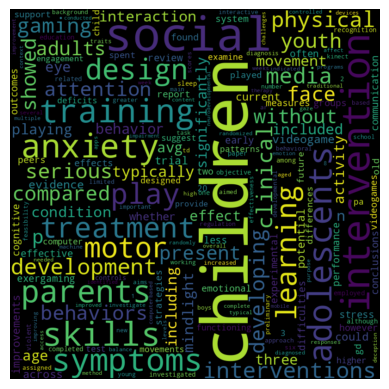

In [11]:
# create image as cloud
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
# store to file
plt.savefig("cloud.png", format="png")
plt.show()

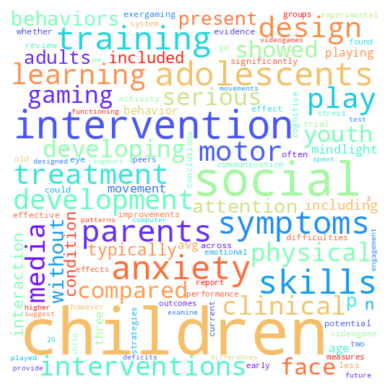

In [13]:
from os import path
from PIL import Image
import numpy as np
import os

mask = np.array(Image.open("figura"))
mask=np.where(mask > 3, 255, mask)
wordcloud = WordCloud(background_color='white',mask=mask,contour_color='#023075',contour_width=3,colormap='rainbow',min_font_size=10).generate_from_frequencies(word_freq)


# create image as cloud
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
# store to file
plt.savefig("cloud.png", format="png")
plt.show()